<img src="http://datamasters.co/logo/logo_DM_academy-horisontal.png" alt="DataMasters" width="300" height="300" align="left">

# Regression - Lab

We are dealing with beer sales data, for approximately 4 years.<br>
This is a real data set, provided by Heineken!

Data columns: <br>
<ul>
<li>Week</li>
<li>Sales volume</li>
<li>Price</li>
<li>Promo share</li>
<li>Unemployment</li>
<li>Economic climate</li>
<li>Financial situation</li>
<li>Competitors price</li>
<li>Competitors promo share</li>
<li>Christmas & New Year</li>
<li>King's Day</li>
<li>Easter</li>
<li>Sinterklaas</li>
<li>Football</li>
<li>Olympic games</li>
<li>Social media Sentiment Total</li>
<li>Social media P/N ratio</li>
<li>Social media (Share of negative mentions)</li>
<li>Temperature</li>
<li>Precipitation</li>
<li>Sunshine duration</li>
    </ul>

In [1]:
# Read in the dataset
# Do not forget to import pandas, numpy, matplotlib and seaborn
###
# Optionally, you can set:
# pd.set_option('display.max_columns', 500)
# to view all of the columns from the dataset

In [5]:
# Print out how many rows/columns the dataset has

In [7]:
# Please use describe to git a better grip of the data

In [9]:
# Can you detect the "dummy" features?
# If so, please create a list named dummies and populate it with the names of dummy columns
# Please do not use a for loop

In [10]:
# Can we detect dummies just from examining the describe output?

In [11]:
# If you examine the data a bit more closely, you will notice that "week" is also a feature
# In fact, week should be the index of the dataset
# Please set 'Week' to be index of the dataset

In [12]:
# Week should be the the index of the data frame

In [13]:
# Recheck the head of the data again
# Week should now be an index column!

In [1]:
# Import utils file and use the table_view_of_missing_values function to detect missing values
import utils as ul


In [18]:
# Examine (visually) the correlation between
# Sales volume (Y)
# and Price (X)

# hint: you can use a function from the utils file

In [20]:
# Please confirm the negative correlation by measuring  pearson_coef. and p_value

## Simple Linear Regression

In [22]:
# Please model the following linear relationship:
# Sales Volume = W0 + W1 * Price
# Use a library you fancy the most
# (please note that some libraries may need reshaping of input data)

# Please do not forget to train-test split the data!

In [25]:
# Please write down the equation (in a comment cell)
# Use lm_sm.params to extract the exact coefficients

In [27]:
# Write down a lambda function for prediction and then predict the Sales Volume for price = 1.5 $

In [30]:
# Create a for loop in which you will change the price from 1 $ to 2.6 $ by step 0.1
# and you will predict the Sales Volume for each step change
# Please plot the resulting data

In [33]:
# Did you get a straight line?
# Is a straight line something you would expect?

In [34]:
# Did you need to write a prediction lambda function?
# Remember that every model has a FIT and a PREDICT method?
# use the predict method to achieve the same thing you achieved using the lambda function

In [35]:
# Examine the errors in the model on the test data set
# Calculate all the Errors (RSE, MSE, RMSE, MAE)!

In [37]:
# Scatter plot the errors

In [39]:
# Plot Residual Histogram with distribution line

In [41]:
# Use sns.residplot to make one more plot

In [43]:
# Create a QQ plot

In [45]:
# Perform a WhitesTest for the residuals

In [46]:
# This is already written, since we have not seen this so far in code!
from statsmodels.stats.diagnostic import het_white as WhitesTest
from statsmodels.compat.numpy import np_matrix_rank
import statsmodels.api as sm

WhitesTest(y_test-predictions, sm.add_constant(X_test))

(2.9197150192169263,
 0.23226936852519195,
 1.4578395334200929,
 0.24113941620590496)

In [47]:
# Are the residuals normally distributed?
# What is the p-value of the test for homoscedasticity?

In [48]:
# Calculate RSE, MSE, RMSE and MAE for the predictions

## Multiple Linear Regression

### Polynomial Linear Regression

In [50]:
# Model the relationship between Sales Volume and Price with a second degree polynomial

In [ ]:
# Perform an error analysis

### Multiple Linear Regression

In [55]:
# Model the relationship:
# Sales volume ~ Price, Promo share, Financial situation, Competitors price and Competitors promo share

In [58]:
# Exclude the 2 features from the previous model that have the poorest p-values
# Retrain the model with the rest 3 features

In [61]:
# Add 3 dummy variables in the model with 3 features

### RIDGE REGRESSION

In [64]:
# Apply ridge regularization on the follwing model
# Sales Volume ~ 'Promo share', 'Competitors price', 'Competitors promo share', 'Christmas & New Year', 'Easter', 'Olympic games'
# Use the following code to generate lambdas
# n_lambdas = 200
# lambdas = np.logspace(-3, 6, n_lambdas)
# Plot the dependency Coefficient ~ Lambda

# Use training set from previous model

In [65]:
from sklearn import linear_model
n_lambdas = 200
lambdas = np.logspace(-3, 6, n_lambdas)
coefs = []
for a in lambdas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)

In [66]:
ax = plt.gca()

ax.plot(lambdas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('lambda')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

### LASSO

In [67]:
# Create two LASSO models
# 1) lambda = -400
# 2) lambda = 5000
# Compare the coefficients retrieved from both models, trained on:
# Sales Volume ~ 'Promo share', 'Competitors price', 'Competitors promo share', 'Christmas & New Year', 'Easter', 'Olympic games'
# Use training data only

In [68]:
from sklearn.linear_model import Lasso
lasso_1 = Lasso(alpha = -400)
lasso_2 = Lasso(alpha = 5000)

In [69]:
lasso_1.fit(X_train, y_train)

Lasso(alpha=-400, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [70]:
lasso_2.fit(X_train, y_train)

Lasso(alpha=5000, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [71]:
lasso_1.coef_

array([3651664.60944381, 4198674.47990959, 1325294.81147882,
       1197431.95923221, -145789.74338723, -378673.3089357 ])

In [72]:
lasso_2.coef_

array([3470165.54414872, 1572113.97714306,       0.        ,
        928301.54954681,      -0.        ,  -75950.01437483])

In [73]:
# Which coefficients were set to 0 from the second LASSO model?

### TIME SERIES

Working with TimeSeries in Python

In [74]:
# Change the index of the dataset with a datetime index

In [75]:
date = pd.to_datetime("01-05-2015")
ts_index = date + pd.to_timedelta(np.arange(201), 'W')

In [76]:
ts_index # examine the DateTime object (called DateTime Index)

DatetimeIndex(['2015-01-05', '2015-01-12', '2015-01-19', '2015-01-26',
               '2015-02-02', '2015-02-09', '2015-02-16', '2015-02-23',
               '2015-03-02', '2015-03-09',
               ...
               '2018-09-03', '2018-09-10', '2018-09-17', '2018-09-24',
               '2018-10-01', '2018-10-08', '2018-10-15', '2018-10-22',
               '2018-10-29', '2018-11-05'],
              dtype='datetime64[ns]', length=201, freq=None)

In [77]:
# We could get the same DateTime Index with the following code:
# ts_index = pd.date_range('2015-01-01', periods=201, freq='W-MON')

In [78]:
beer_data.shape

(201, 21)

In [79]:
# We have 201 rows, meaning that we have to provide 201 weekly timestamps!
ts_index.shape

(201,)

In [80]:
beer_data_ts = beer_data.copy()

In [81]:
beer_data_ts.index = ts_index

In [82]:
# Let us now examine the information about the dataset
beer_data_ts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 201 entries, 2015-01-05 to 2018-11-05
Data columns (total 21 columns):
Sales volume                                 201 non-null float64
Price                                        201 non-null float64
Promo share                                  201 non-null float64
Unemployment                                 201 non-null float64
Economic climate                             201 non-null float64
Financial situation                          201 non-null float64
Competitors price                            201 non-null float64
Competitors promo share                      201 non-null float64
Christmas & New Year                         201 non-null int64
King's Day                                   201 non-null int64
Easter                                       201 non-null int64
Sinterklaas                                  201 non-null int64
Football                                     201 non-null int64
Olympic games               

In [83]:
# and the five top rows
beer_data_ts.head()

Sales volume     Price  Promo share  Unemployment  \
2015-01-05     3740647.6  1.635016     0.749089      7.000000   
2015-01-12     1557032.4  1.802296     0.381650      7.000000   
2015-01-19     1547997.2  1.965868     0.343765      7.192916   
2015-01-26     2565525.7  1.630730     0.664251      7.368666   
2015-02-02     1665819.4  1.852473     0.414259      7.510083   

            Economic climate  Financial situation  Competitors price  \
2015-01-05          4.000000           -17.000000           1.475020   
2015-01-12          4.000000           -17.000000           1.627360   
2015-01-19          4.828826           -16.716865           1.501296   
2015-01-26          5.526122           -16.446983           1.576631   
2015-02-02          5.960357           -16.203610           1.568776   

            Competitors promo share  Christmas & New Year  King's Day  Easter  \
2015-01-05                 0.532742                     1           0       0   
2015-01-12                 0.264413                     0           0       0   
2015-01-19                 0.522655                     0           0       0   
2015-01-26                 0.463989                     0           0       0   
2015-02-02                 0.527898                     0           0       0   

            Sinterklaas  Football  Olympic games  \
2015-01-05            0         0              0   
2015-01-12            0         0              0   
2015-01-19            0         0              0   
2015-01-26            0         0              0   
2015-02-02            0         0              0   

            Social media Sentiment Total  Social media P/N ratio  \
2015-01-05                            49                0.265306   
2015-01-12                           140                0.164286   
2015-01-19                           231                0.398268   
2015-01-26                           114                0.157895   
2015-02-02                            92                0.315217   

            Social media (Share of negative mentions)  Temperature  \
2015-01-05                                   0.081633     4.516176   
2015-01-12                                   0.071429     5.840336   
2015-01-19                                   0.017316     5.547479   
2015-01-26                                   0.140351     0.606723   
2015-02-02                                   0.108696     3.342017   

            Precipitation  Sunshine duration   Price^2  
2015-01-05      21.195312          30.459677  2.673279  
2015-01-12      29.133929          15.534562  3.248272  
2015-01-19      59.700893          17.838710  3.864637  
2015-01-26      10.620536          19.198157  2.659280  
2015-02-02      33.973214          22.391705  3.431657

In [84]:
# Can we notice the difference between the two charts given below?
# Please pay attention to the X axis

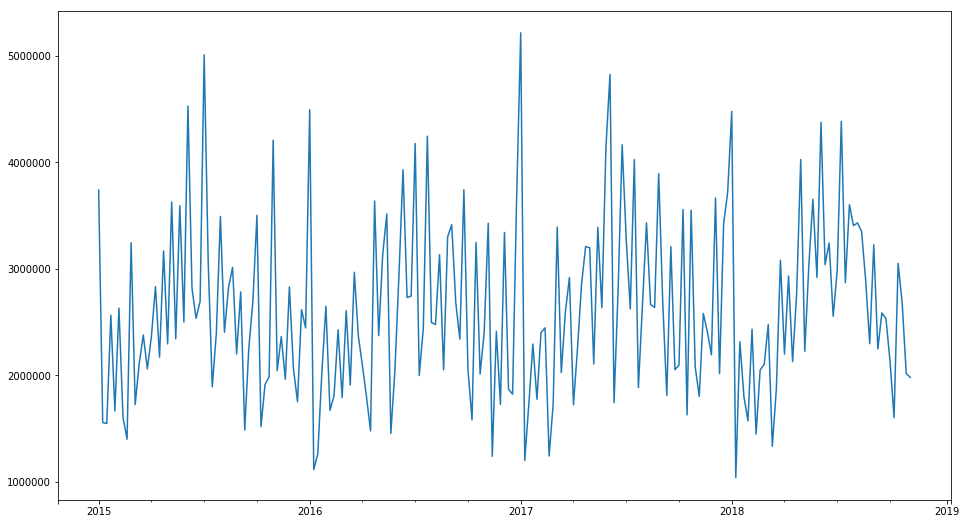

In [85]:
beer_data_ts['Sales volume'].plot(figsize=(16,9));

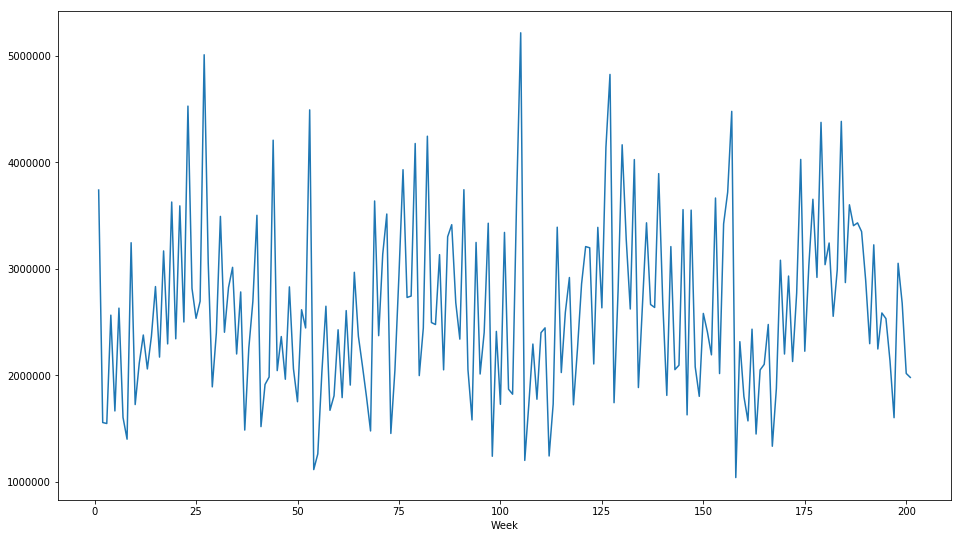

In [86]:
beer_data['Sales volume'].plot(figsize=(16,9));

In [87]:
# What can we make of a TimeSeries?

Time Series Components<br>
A useful abstraction for selecting forecasting methods is to break a time series down into systematic and unsystematic components.<br>
<ul>
   <li> <b>Systematic</b>: Components of the time series that have consistency or recurrence and can be described and modeled.</li>
    <li><b>
        Non-Systematic</b>: Components of the time series that cannot be directly modeled.</ul>
A given time series is thought to consist of three systematic components including level, trend, seasonality, and one non-systematic component called noise.<br>

These components are defined as follows:<br>
<ul>
<li><b>Level</b>: The average value in the series.</li>
<li><b>Trend</b>: The increasing or decreasing value in the series.</li>
<li><b>Seasonality</b>: The repeating short-term cycle in the series.</li>
<li><b>Noise</b>: The random variation in the series.</li>
 </ul>

<b>Combining Time Series Components</b>
    
A series is thought to be an aggregate or combination of these four components.

All series have a level and noise. The trend and seasonality components are optional.

It is helpful to think of the components as combining either additively or multiplicatively.

<b>Additive Model</b>

An additive model suggests that the components are added together as follows:

<b>y(t) = Level + Trend + Seasonality + Noise</b>

An additive model is linear where changes over time are consistently made by the same amount.

A linear trend is a straight line.

A linear seasonality has the same frequency (width of cycles) and amplitude (height of cycles).

<b>Multiplicative Model</b>

A multiplicative model suggests that the components are multiplied together as follows:
    
    
<b>y(t) = Level * Trend * Seasonality * Noise</b>

    
A multiplicative model is nonlinear, such as quadratic or exponential. Changes increase or decrease over time.

A nonlinear trend is a curved line.

A non-linear seasonality has an increasing or decreasing frequency and/or amplitude over time.

Please refer to:
>statsmodels.tsa.seasonal.seasonal_decompose

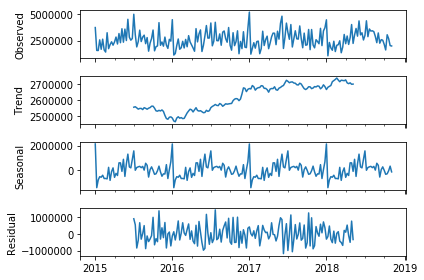

In [88]:
from statsmodels.tsa.seasonal import seasonal_decompose
series = beer_data_ts['Sales volume']
result = seasonal_decompose(series, model='additive')
result.plot();

In [89]:
# ACF - Autocorrelation Function for TimeSeries

<b>Correlation and Autocorrelation</b>

We can calculate the correlation for time series observations with observations with previous time steps, called lags. Because the correlation of the time series observations is calculated with values of the same series at previous times, this is called a serial correlation, or an autocorrelation.

A plot of the autocorrelation of a time series by lag is called the AutoCorrelation Function, or the acronym ACF. This plot is sometimes called a correlogram or an autocorrelation plot.

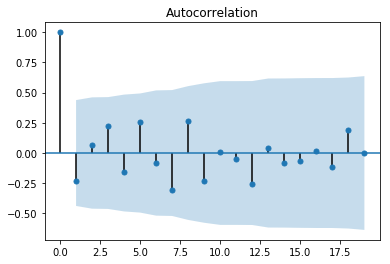

In [90]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(series[:20]);

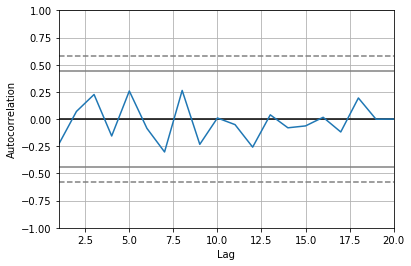

In [91]:
from pandas.tools.plotting import autocorrelation_plot
autocorrelation_plot(series[:20]);

<b>Stationary Time Series</b>

The observations in a stationary time series are not dependent on time.

Time series are stationary if they do not have trend or seasonal effects. Summary statistics calculated on the time series are consistent over time, like the mean or the variance of the observations.

When a time series is stationary, it can be easier to model. Statistical modeling methods assume or require the time series to be stationary to be effective.

<b>Non-Stationary Time Series</b>

Observations from a non-stationary time series show seasonal effects, trends, and other structures that depend on the time index.

Summary statistics like the mean and variance do change over time, providing a drift in the concepts a model may try to capture.

Classical time series analysis and forecasting methods are concerned with making non-stationary time series data stationary by identifying and removing trends and removing seasonal effects.

<b>Augmented Dickey-Fuller test</b>

The null hypothesis of the test is that the time series can be represented by a unit root, that it is not stationary (has some time-dependent structure). The alternate hypothesis (rejecting the null hypothesis) is that the time series is stationary.
<ul>
    <li><b>Null Hypothesis (H0)</b>: If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.</li>
<li><b>Alternate Hypothesis (H1)</b>: The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.</li>
    </ul>


In [92]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(series)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.422478
p-value: 0.010216
Critical Values:
	1%: -3.464
	5%: -2.876
	10%: -2.575


In [93]:
# Create L-1 lag
beer_data_ts['Sales volume L-1'] = beer_data_ts['Sales volume'].shift()

In [94]:
beer_data_ts.head()

Sales volume     Price  Promo share  Unemployment  \
2015-01-05     3740647.6  1.635016     0.749089      7.000000   
2015-01-12     1557032.4  1.802296     0.381650      7.000000   
2015-01-19     1547997.2  1.965868     0.343765      7.192916   
2015-01-26     2565525.7  1.630730     0.664251      7.368666   
2015-02-02     1665819.4  1.852473     0.414259      7.510083   

            Economic climate  Financial situation  Competitors price  \
2015-01-05          4.000000           -17.000000           1.475020   
2015-01-12          4.000000           -17.000000           1.627360   
2015-01-19          4.828826           -16.716865           1.501296   
2015-01-26          5.526122           -16.446983           1.576631   
2015-02-02          5.960357           -16.203610           1.568776   

            Competitors promo share  Christmas & New Year  King's Day  Easter  \
2015-01-05                 0.532742                     1           0       0   
2015-01-12                 0.264413                     0           0       0   
2015-01-19                 0.522655                     0           0       0   
2015-01-26                 0.463989                     0           0       0   
2015-02-02                 0.527898                     0           0       0   

            Sinterklaas  Football  Olympic games  \
2015-01-05            0         0              0   
2015-01-12            0         0              0   
2015-01-19            0         0              0   
2015-01-26            0         0              0   
2015-02-02            0         0              0   

            Social media Sentiment Total  Social media P/N ratio  \
2015-01-05                            49                0.265306   
2015-01-12                           140                0.164286   
2015-01-19                           231                0.398268   
2015-01-26                           114                0.157895   
2015-02-02                            92                0.315217   

            Social media (Share of negative mentions)  Temperature  \
2015-01-05                                   0.081633     4.516176   
2015-01-12                                   0.071429     5.840336   
2015-01-19                                   0.017316     5.547479   
2015-01-26                                   0.140351     0.606723   
2015-02-02                                   0.108696     3.342017   

            Precipitation  Sunshine duration   Price^2  Sales volume L-1  
2015-01-05      21.195312          30.459677  2.673279               NaN  
2015-01-12      29.133929          15.534562  3.248272         3740647.6  
2015-01-19      59.700893          17.838710  3.864637         1557032.4  
2015-01-26      10.620536          19.198157  2.659280         1547997.2  
2015-02-02      33.973214          22.391705  3.431657         2565525.7

In [95]:
# Create an OLS model:
# Sales volume ~ Sales volume L-1, Price

In [96]:
X = beer_data_ts[['Sales volume L-1', 'Price']]
Y = beer_data_ts['Sales volume']

In [97]:
lm_sm_multi_AR = sm.OLS(Y[1:], sm.add_constant(X.dropna())).fit()
lm_sm_multi_AR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Sales volume   R-squared:                       0.475
Model:                            OLS   Adj. R-squared:                  0.470
Method:                 Least Squares   F-statistic:                     89.21
Date:                Wed, 12 Jun 2019   Prob (F-statistic):           2.60e-28
Time:                        11:44:47   Log-Likelihood:                -2944.2
No. Observations:                 200   AIC:                             5894.
Df Residuals:                     197   BIC:                             5904.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             8.646e+06   4.76e+05     18.161      0.000    7.71e+06    9.59e+06
Sales volume L-1     0.1861      0.053      3.509      0.001       0.082       0.291
Price             -3.52e+06   2.64e+05    -13.354      0.000   -4.04e+06      -3e+06
==============================================================================
Omnibus:                       10.400   Durbin-Watson:                   1.212
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               10.562
Skew:                           0.547   Prob(JB):                      0.00509
Kurtosis:                       3.262   Cond. No.                     3.48e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.48e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [98]:
# Let us use a library for Autoregression
# HOMEWORK
# (S)AR(I)MA(X) models from statsmodels

# Great Job!

<img src="http://datamasters.co/logo/logo_DM_academy-horisontal.png" alt="DataMasters" width="300" height="300" align="left">